In [1]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5

In [2]:
file = h5.File('../output/lcdm.h5')

In [3]:
list(file.keys())

['nodes-1.0', 'nodes-2.0', 'nodes-3.0', 'potential']

In [70]:
data = file['nodes-2.0']

In [83]:
file.close()

In [71]:
idx = np.where(np.logical_and(data['position'][:, 0] > 15.0, data['position'][:, 0] < 17.0))[0]

In [72]:
x = data['position'][idx]
v = data['velocity'][idx]

(5, 27)

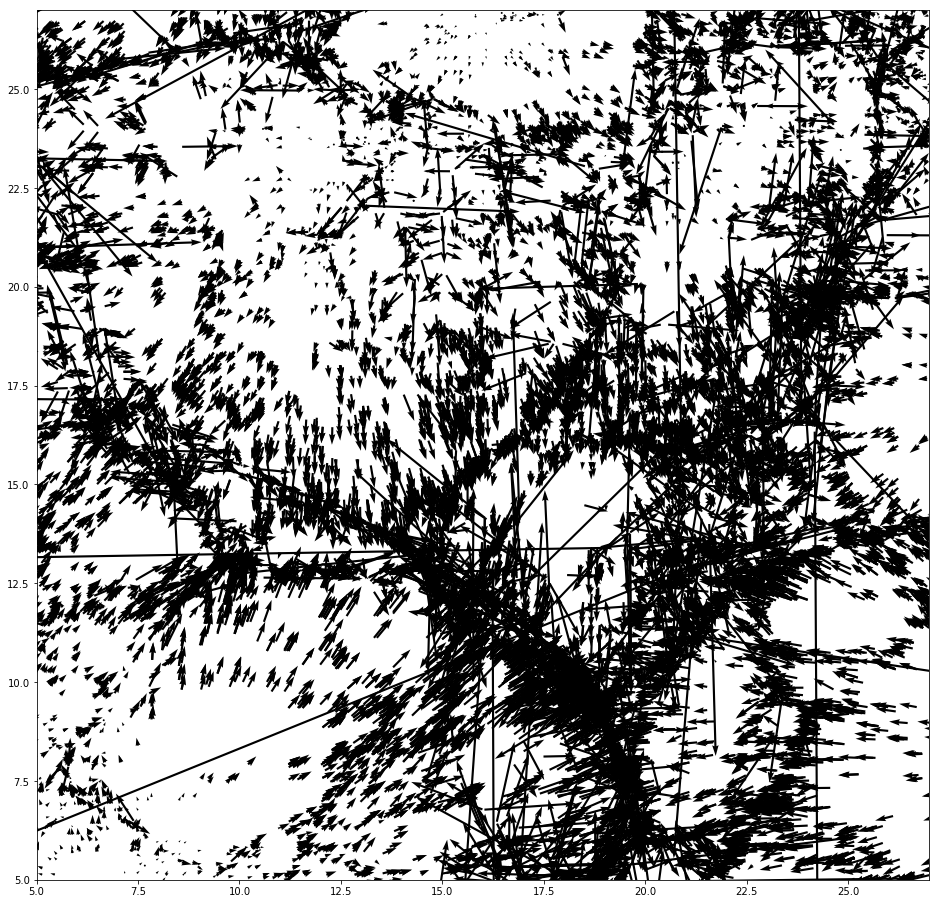

In [82]:
fig, ax = plt.subplots(figsize=(16, 16))
# ax.scatter(x[:,1], x[:,2], c=data['node_type'][idx], s=data['mass'][idx]*10)
ax.quiver(x[:,1], x[:,2], v[:, 1], v[:, 2], linewidths=data['mass'][idx]*10, scale=100)
ax.set_xlim([5, 27])
ax.set_ylim([5, 27])

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         1.,  1.,  0.,  0.,  3.,  2.,  1.,  3.,  4.,  1.,  6.,  2.,  4.,
         5.,  3., 17.,  8.,  6.,  7.,  7.,  4.,  4.,  3., 17.,  6.,  6.,
         7.,  5.,  9.,  5.,  4.,  3.,  4.,  1.,  1.,  1.,  2.]),
 array([-0.74663587, -0.6478927 , -0.54914953, -0.45040637, -0.3516632 ,
        -0.25292004, -0.15417687, -0.05543371,  0.04330946,  0.14205263,
         0.24079579,  0.33953896,  0.43828212,  0.53702529,  0.63576845,
         0.73451162,  0.83325479,  0.93199795,  1.03074112,  1.12948428,
         1.22822745,  1.32697061,  1.42571378,  1.52445695,  1.62320011,
         1.72194328,  1.82068644,  1.91942961,  2.01817277,  2.11691594,
         2.21565911,  2.31440227,  2.41314544,  2.5118886 ,  2.61063177,
         2.70937494,  2.8081181 ,  2.90686127,  3.00560443,  3.1043476 ,
         3.20309076,  3.30183393,  3.4005771 ,  3.49932026,  3.59806343,
         3.69680659,  3.79554976,  3.89429292,  3.99303609,

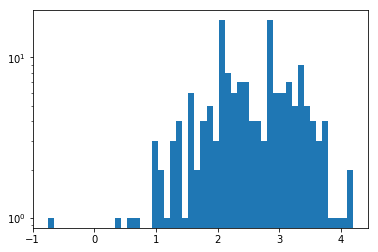

In [75]:
idx = np.where(data['node_type'] == 4)[0]
plt.hist(np.log(data['mass'][idx]), bins=50, log=True)

In [22]:
X = (np.arange(128)*150./128)[np.indices([128,128,128])]

In [23]:
X_abs = np.sqrt((X**2).sum(axis=0))

In [24]:
Y = (X + 150/2) % 150 - 150/2

In [25]:
Y_abs = np.sqrt((Y**2).sum(axis=0))

In [26]:
mask = np.where(Y_abs < 8.0, 1.0, 0.0)
mask /= mask.sum()

In [27]:
from numpy import fft

In [28]:
filtered = fft.ifftn(fft.fftn(data) * fft.fftn(mask)).real

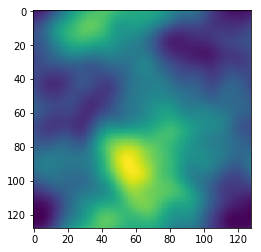

In [29]:
plt.imshow(filtered[0])

In [78]:
filtered.std()

3.0416129100629163

In [79]:
data[:].std()

20.702835356287846

In [80]:
q = fft.fftn(mask)

In [82]:
z = (q * q.conj()).real

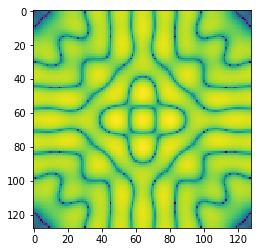

In [85]:
plt.imshow(np.log(z[50]))

In [30]:
file.close()